<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Heart_attack_possibility_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd
import math
import random
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [3]:
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.shape

(303, 14)

In [7]:
# split data into two parts training and testing 
train_set = dataset.sample(frac=0.833,random_state=0)
test_set = dataset.drop(train_set.index)

In [8]:
train_set.shape

(252, 14)

In [9]:
test_set.shape

(51, 14)

In [10]:
train_set.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


In [12]:
# bipartion in feature and target
train_set_feature = train_set.values[:,:-1]
train_set_target = train_set.values[:,-1:]
test_set_feature = test_set.values[:,:-1]
test_set_target = test_set.values[:,-1:]

In [13]:
#feature normalization
def featureNormalization(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_norm=(x-mean)/std
    return x_norm,mean,std

In [14]:
def sigmoid(z): # we used for differenciate from linear regression to logistic regression
    #Return  Sigmoid of Z
    return (1/(1+np.exp(-z)))

In [15]:
def costfunction(theta,x,y):
    # return cost and grad
    m=len(y)
    predictions= []
    error=0
    
    for i in range(m):
        predictions.append(sigmoid(np.dot(x[i],theta)))
        error+=((-y[i])*np.log(predictions[i])-(1-y[i])*np.log(1-predictions[i]))
    
    cost = (1/m)*error

    grad = (1/m) *np.dot(x.transpose(),(predictions-y))
    return cost,grad

In [16]:
def gradientDescent(theta,x,y,alpha,iter_num):
    # update theta in each iteration
    # return theta cost values of each iteration
    m=len(y) 
    cost_function_values =[]
    
    for i in range(iter_num):
        cost, grad = costfunction(theta,x,y)
        theta = theta - (alpha * grad)
        cost_function_values.append(cost)
            
    
    return theta,cost_function_values

In [17]:
m , n = train_set_feature.shape[0], train_set_feature.shape[1]
train_set_feature, train_set_feature_mean, train_set_feature_std = featureNormalization(train_set_feature)  
train_set_feature= np.append(np.ones((m,1)),train_set_feature,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
train_set_target=train_set_target.reshape(m,1)
initial_theta = np.zeros((n+1,1))

In [18]:
theta,cost_function_values=gradientDescent(initial_theta,train_set_feature,train_set_target,0.5,100)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

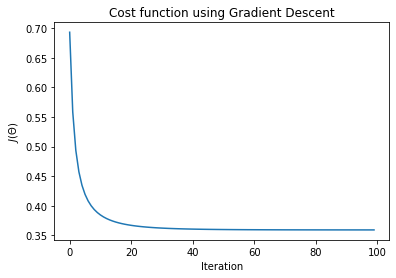

In [19]:
#plot for cost vs iteration
plt.plot(cost_function_values)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [20]:
m1 , n1 = test_set_feature.shape[0], test_set_feature.shape[1]
test_set_feature, test_set_feature_mean, test_set_feature_std = featureNormalization(test_set_feature)
test_set_feature= np.append(np.ones((m1,1)),test_set_feature,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
test_set_target=test_set_target.reshape(m1,1)

In [21]:
#testing time!
confusion_matrix=[[0,0],[0,0]]
for i in range(m1):
    predictions=sigmoid(np.dot(test_set_feature[i],theta))
    if predictions>0.50:
        prediction = 1
    else:
        prediction = 0
    print(predictions,prediction,test_set_target[i])
    x = int((test_set_target[i][0]-1)**2)
    y = (prediction-1)**2
    confusion_matrix[x][y]+=1


[0.90063568] 1 [1.]
[0.78014485] 1 [1.]
[0.84625937] 1 [1.]
[0.94290676] 1 [1.]
[0.5503232] 1 [1.]
[0.92056341] 1 [1.]
[0.96692252] 1 [1.]
[0.94366044] 1 [1.]
[0.91800163] 1 [1.]
[0.98635757] 1 [1.]
[0.66506133] 1 [1.]
[0.94255918] 1 [1.]
[0.46695142] 0 [1.]
[0.88605146] 1 [1.]
[0.96623045] 1 [1.]
[0.74789742] 1 [1.]
[0.85671567] 1 [1.]
[0.99323259] 1 [1.]
[0.7207824] 1 [1.]
[0.97484484] 1 [1.]
[0.96592612] 1 [1.]
[0.93487866] 1 [1.]
[0.99039656] 1 [1.]
[0.74849776] 1 [1.]
[0.68145583] 1 [1.]
[0.00679516] 0 [0.]
[0.60299131] 1 [0.]
[0.00882522] 0 [0.]
[0.94589098] 1 [0.]
[0.36566316] 0 [0.]
[0.67042103] 1 [0.]
[0.10926419] 0 [0.]
[0.00668055] 0 [0.]
[0.00549712] 0 [0.]
[0.23827556] 0 [0.]
[0.06257072] 0 [0.]
[0.02115027] 0 [0.]
[0.14420598] 0 [0.]
[0.01502607] 0 [0.]
[0.07259698] 0 [0.]
[0.01192932] 0 [0.]
[0.09981996] 0 [0.]
[0.27538029] 0 [0.]
[0.54771845] 1 [0.]
[0.60549158] 1 [0.]
[0.72920789] 1 [0.]
[0.86221021] 1 [0.]
[0.30197065] 0 [0.]
[0.19707164] 0 [0.]
[0.07445241] 0 [0.]
[0

In [22]:
#Confusion Matrix
for i in range(2):
    for j in range(2):
        print(confusion_matrix[i][j],end=' ')
    print()

24 1 
7 19 


In [23]:
#Accuracy = (TP + TN) /(TP + FP + TN + FN)
accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/m1

#Precision = TP / (TP + FP)
precision = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1])

#Recall = TP / (TP + FN)
recall = confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])

#F1 Score = 2 * (Precision * Recall)/(Precision + Recall )
f1_score = 2 * (precision * recall)/(precision + recall)

print("Accuracy = ",accuracy)
print("Prediction = ",precision)
print("Recall = ",recall)
print("F1 Score = ",f1_score)


Accuracy =  0.8431372549019608
Prediction =  0.96
Recall =  0.7741935483870968
F1 Score =  0.8571428571428571
